In [1]:
## Importing important stuff
import random
import numpy as np
import pandas as pd
from PIL import Image 
import tifffile as tiff
             ###############
#plotting
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go
            ####################
#machine learning stuff
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical   
###
from keras import models
from keras import layers
###
import pickle as pkl
import time

Using TensorFlow backend.


In [6]:
import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, concatenate
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras import backend as K

import os
import pickle

In [3]:
##  very good

#load other testing data
x_TT_orig = np.load('x_true_test_128.npy')
y_TT_orig = np.load('y_true_test_128.npy')

# reshape them 
x_TT = x_TT_orig.reshape(x_TT_orig.shape[0],128,128,1)
y_TT = y_TT_orig.reshape(y_TT_orig.shape[0],128,128,1)
#predict the other testing data. 
#
#

In [4]:
x_TT_sc = x_TT/3020.0
y_TT_sc = y_TT/3020.0

In [7]:
#loading the model 
model = load_model('UNET_128_short.h5')

In [8]:
new_pre_sc= model.predict(x_TT_sc[:20])

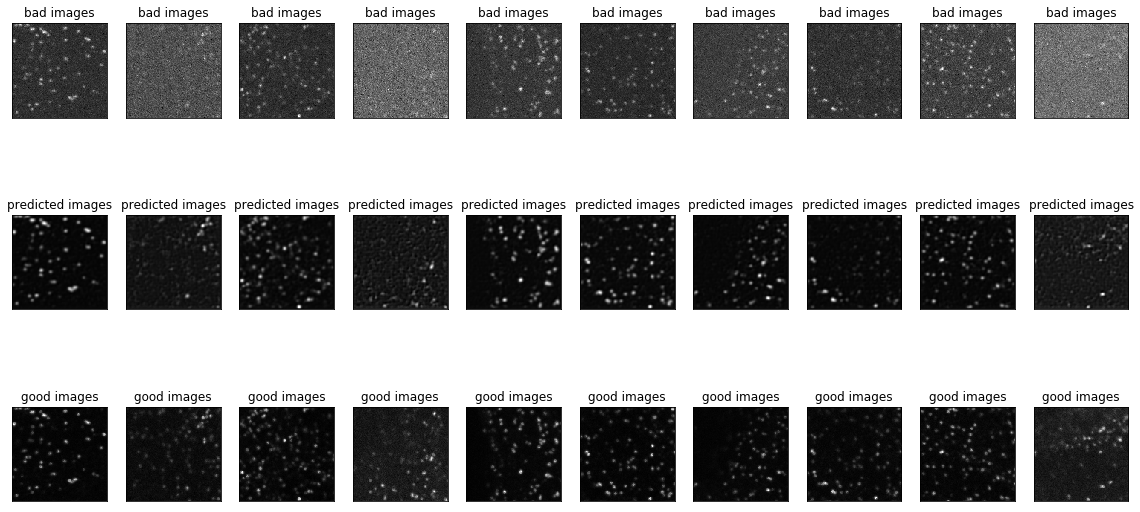

In [11]:
#checking correspondance 
#####check for correspondance
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    
    ax1 = plt.subplot(3, n, i + 1)
    ax1.title.set_text('bad images')
    plt.imshow(x_TT_sc[i].reshape(128, 128))
    plt.gray()
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
        # display reconstruction
    
    ax2 = plt.subplot(3, n, i + 1 + n)
    ax2.title.set_text('predicted images')
    plt.imshow(new_pre_sc[i].reshape(128, 128))
    plt.gray()
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
            # display reconstruction
    
    ax3 = plt.subplot(3, n, i + 1 + n+n)
    ax3.title.set_text('good images')
    plt.imshow(y_TT_sc[i].reshape(128, 128))
    plt.gray()
    ax3.get_xaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)

plt.show()

In [14]:
#### Code to save one tiff image
####### saving one frame
from PIL import Image
data = x_TT_orig[1]
im = Image.fromarray(data)
im.save('test_2.tif')

In [41]:
type(y_TT_sc[:4])

numpy.ndarray

In [37]:
###########  Code to save multiple images as mutliple frame TIFF File
from tifffile import imsave
###What goes inside this array has to be (#number of frames, 128, 128, 1)
arr= np.uint16(y_TT_sc[:4]*3020.0)
imsave('multipage(6).tif', arr)

In [52]:
type(y_TT_sc[1])

numpy.ndarray

In [57]:
## trying the loop once 
listo=[0,0,0]
listo[0]=x_TT_orig[1]
listo[1]=y_TT_orig[1]
listo[2]=new_pre_sc[1].reshape(128, 128)*3020.0


In [58]:
arr_listo=np.asarray(listo).reshape(3,128,128,1)
arr_listo.shape

(3, 128, 128, 1)

In [59]:
type(arr_listo[2])

numpy.ndarray

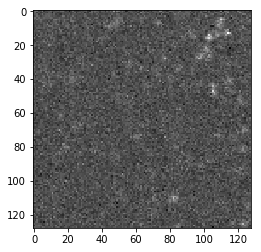

In [60]:
plt.imshow(listo[0])

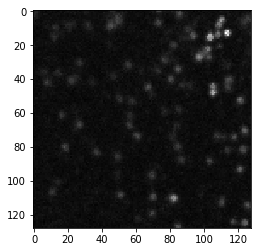

In [61]:
plt.imshow(listo[1])

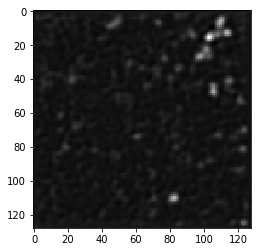

In [62]:
plt.imshow(listo[2])

In [68]:
arr = np.uint16(np.asarray(listo).reshape(3,128,128,1))
imsave('mutlipage.tif', arr)

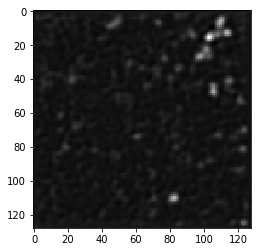

In [29]:
plt.imshow(new_pre_sc[1].reshape(128, 128)*3020.0)

In [ ]:
y_TT

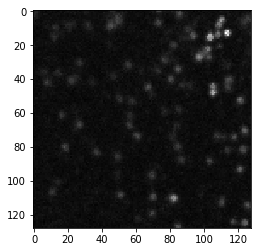

In [32]:
plt.imshow(y_TT_orig[1])

In [49]:
print(new_pre_sc[0].reshape(128, 128)*3020.0)

[[127.2923   103.70137  100.859886 ... 124.944954 121.3594   124.56647 ]
 [127.12368  109.05809  164.7525   ... 122.38966  121.35489  121.75683 ]
 [121.09862  135.8366   232.80386  ... 120.606865 119.32861  115.56674 ]
 ...
 [123.8061   117.22528  123.76555  ... 116.89968  120.60972  118.090454]
 [130.88124  131.25351  123.33896  ... 121.36153  122.036804 119.86164 ]
 [127.90845  136.69714  127.272606 ... 126.06299  127.805855 127.9909  ]]


In [69]:
#### Code to save one tiff image
####### saving one frame
from PIL import Image
data = x_TT_orig[1]
im = Image.fromarray(data)
im.save('tif_x1.tif')
#### Code to save one tiff image
####### saving one frame
from PIL import Image
data = y_TT_orig[1]
im = Image.fromarray(data)
im.save('tif_y1.tif')
#### Code to save one tiff image
####### saving one frame
from PIL import Image
data = new_pre_sc[1].reshape(128, 128)*3020.0
im = Image.fromarray(data)
im.save('tif_p1.tif')